# Produce the various exclusion plots

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [11]:
hierarchy = 'light'
D_or_M = 'dirac'

save_folder = f'../fig/6_limit_visualisation/'
!mkdir -p $save_folder

set_plot_style()

In [12]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

light dirac FHC
Wall time: 10.423203468322754 s, CPU time: 0.8856004989999988
light dirac RHC
Wall time: 20.434943199157715 s, CPU time: 0.9086222429999964


In [13]:
analysis_names = [
                    'nueccqe_fgd',
                    'nueccqe_fgd_projection1',
                    'nueccqe_fgd_projection2',
                    'tpc_light',
                    'tpc_light_projection1',
                    'tpc_light_projection2',
                    
                    # 'single_photon_fgd',
                    # 'single_photon_fgd_projection1',
                    # 'single_photon_fgd_projection2',
                  ]

# $m_{Z^\prime} - \varepsilon$

In [14]:
case_vars = ['mz', 'epsilon']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

nueccqe_fgd FHC
nueccqe_fgd RHC
nueccqe_fgd_projection1 FHC
nueccqe_fgd_projection1 RHC
nueccqe_fgd_projection2 FHC
nueccqe_fgd_projection2 RHC
tpc_light FHC
tpc_light RHC
tpc_light_projection1 FHC
tpc_light_projection1 RHC
tpc_light_projection2 FHC
tpc_light_projection2 RHC


In [15]:
likes['TPC'] = likes['tpc_light']
likes['FGD'] = likes['nueccqe_fgd']

likes['tpc_light_projection1_2'] = combine_likes([likes['tpc_light_projection1'], likes['tpc_light_projection2']])
likes['nueccqe_fgd_projection1_2'] = combine_likes([likes['nueccqe_fgd_projection1'], likes['nueccqe_fgd_projection2']])
# likes['single_photon_fgd_projection1_2'] = combine_likes([likes['single_photon_fgd_projection1'], likes['single_photon_fgd_projection2']])

likes['This work'] = combine_likes([likes['tpc_light'], likes['nueccqe_fgd']])
likes['Combination'] = likes['This work']
likes['Full T2K-I'] = combine_likes([likes['tpc_light_projection1'], likes['nueccqe_fgd_projection1']])
likes['Full T2K-I + T2K-II'] = combine_likes([likes['tpc_light_projection1_2'], likes['nueccqe_fgd_projection1_2']])

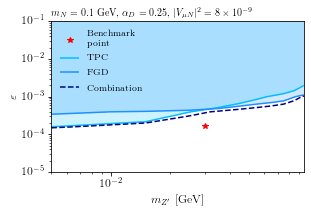

In [17]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['TPC', 'FGD', 'Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_fgd',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'])

KeyError: 'nueccqe_fgd'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


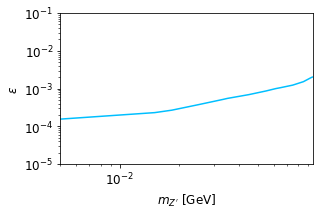

In [9]:
basic_contour_plot(case_vars,
                   retrieved,
                   likes,
                   ['tpc_light', 'nueccqe_fgd', 'single_photon_fgd'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_vs_fgd',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


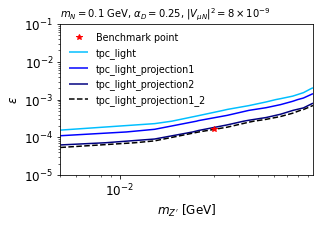

In [10]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light', 'tpc_light_projection1', 'tpc_light_projection2', 'tpc_light_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_light_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', '-', '-', '--'])

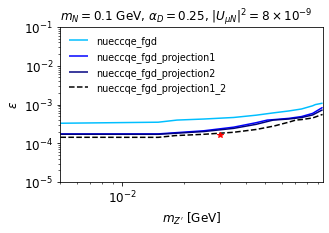

In [10]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'nueccqe_fgd_projection1', 'nueccqe_fgd_projection2', 'nueccqe_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='nueccqe_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', '-', '-', '--'])

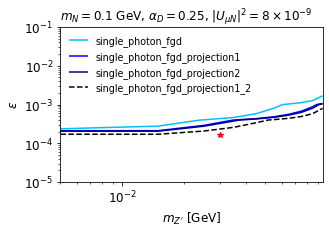

In [11]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['single_photon_fgd', 'single_photon_fgd_projection1', 'single_photon_fgd_projection2', 'single_photon_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='single_photon_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', '-', '-', '--'])

(0.0001, 0.001)

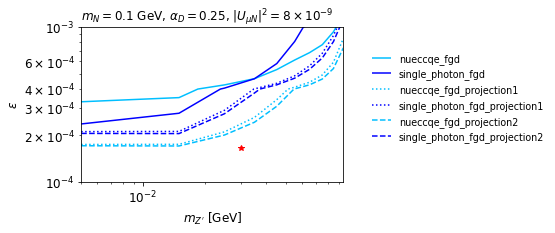

In [40]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'single_photon_fgd', 
                    'nueccqe_fgd_projection1', 'single_photon_fgd_projection1',
                    'nueccqe_fgd_projection2', 'single_photon_fgd_projection2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='single_photon_vs_nueccqe',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'deepskyblue', 'blue', 'deepskyblue', 'blue',],
                   legend_outside=True,
                   linestyles=['-', '-', ':', ':', '--', '--'])

plt.ylim(1e-4, 1e-3)

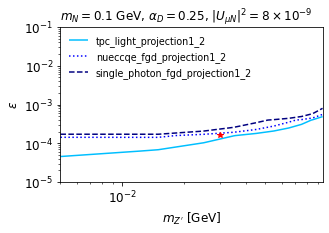

In [41]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light_projection1_2', 'nueccqe_fgd_projection1_2', 'single_photon_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='only_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', '--'])

adding contour limits


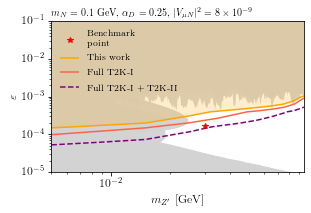

In [31]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_light_plot(ax)
ax.set_ylim(1e-5, 1e-1)
ax.set_xlim(0.005, 0.095)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='upper left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'])

# Heavy $m_N - |U_{\mu N}|^2$

In [11]:
case_vars = ['m4', 'Umu4_2']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

nueccqe_fgd FHC
nueccqe_fgd RHC
nueccqe_fgd_projection1 FHC
nueccqe_fgd_projection1 RHC
nueccqe_fgd_projection2 FHC
nueccqe_fgd_projection2 RHC
tpc_light FHC
tpc_light RHC
tpc_light_projection1 FHC
tpc_light_projection1 RHC
tpc_light_projection2 FHC
tpc_light_projection2 RHC


In [14]:
likes['TPC'] = likes['tpc_light']
likes['FGD'] = likes['nueccqe_fgd']

likes['tpc_light_projection1_2'] = combine_likes([likes['tpc_light_projection1'], likes['tpc_light_projection2']])
likes['nueccqe_fgd_projection1_2'] = combine_likes([likes['nueccqe_fgd_projection1'], likes['nueccqe_fgd_projection2']])
# likes['single_photon_fgd_projection1_2'] = combine_likes([likes['single_photon_fgd_projection1'], likes['single_photon_fgd_projection2']])

likes['This work'] = combine_likes([likes['tpc_light'], likes['nueccqe_fgd']])
likes['Combination'] = likes['This work']
likes['Full T2K-I'] = combine_likes([likes['tpc_light_projection1'], likes['nueccqe_fgd_projection1']])
likes['Full T2K-I + T2K-II'] = combine_likes([likes['tpc_light_projection1_2'], likes['nueccqe_fgd_projection1_2']])

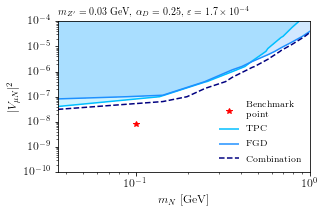

In [15]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['TPC', 'FGD', 'Combination'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'dodgerblue', 'navy'],
                   fill=[True, True, False],
                   linestyles=['-', '-', '--'])

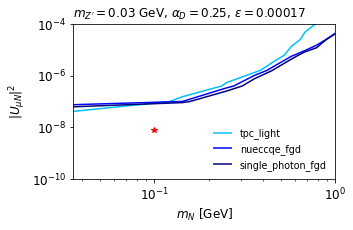

In [17]:
basic_contour_plot(case_vars,
                   retrieved,
                   likes,
                   ['tpc_light', 'nueccqe_fgd', 'single_photon_fgd'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_vs_fgd',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

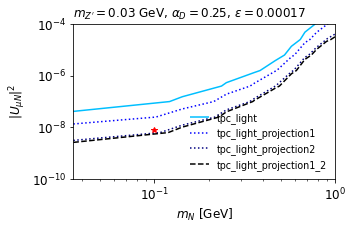

In [18]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light', 'tpc_light_projection1', 'tpc_light_projection2', 'tpc_light_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='tpc_light_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

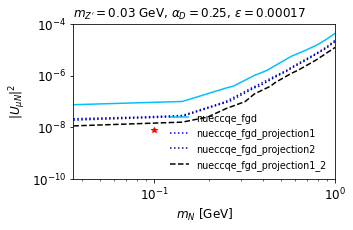

In [19]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'nueccqe_fgd_projection1', 'nueccqe_fgd_projection2', 'nueccqe_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='nueccqe_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

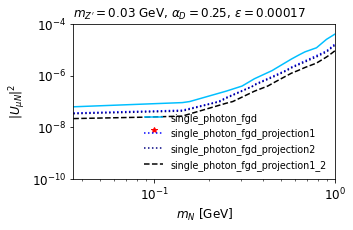

In [20]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['single_photon_fgd', 'single_photon_fgd_projection1', 'single_photon_fgd_projection2', 'single_photon_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='single_photon_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

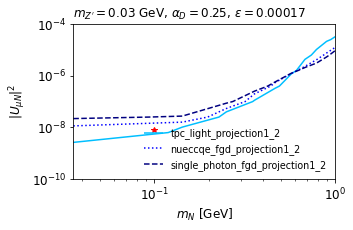

In [21]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light_projection1_2', 'nueccqe_fgd_projection1_2', 'single_photon_fgd_projection1_2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='only_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', '--'])

In [ ]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'single_photon_fgd', 
                    'nueccqe_fgd_projection1', 'single_photon_fgd_projection1',
                    'nueccqe_fgd_projection2', 'single_photon_fgd_projection2'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='single_photon_vs_nueccqe',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'deepskyblue', 'blue', 'deepskyblue', 'blue',],
                   legend_outside=True,
                   linestyles=['-', '-', ':', ':', '--', '--'])

plt.ylim(1e-9, 1e-7)

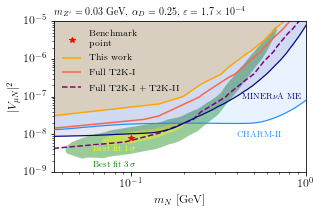

In [16]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_light_plot(ax)
ax.set_ylim(1e-9, 1e-5)
ax.set_xlim(0.0358, 1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   D_or_M=D_or_M,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='upper left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'])

# Understand scaling of the tpc analysis

In [13]:
from analyses_dict import *
from parameters_dict import *

In [28]:
new_tpc_volume/(3*tpc_fiducial_volume) * 0.01

0.004030267279202977

In [32]:
analyses['tpc_light']

{'FHC': {'pot': 1.234e+21,
  'syst': 0.2,
  'binning': 1,
  'var': None,
  'data': 0,
  'mc': 0.563,
  'masses': {'argon': 0.01},
  'selection': 'cut_based',
  'efficiency': 0.1,
  'n_target': {'argon': 1.5074947431661159e+26}},
 'RHC': {'pot': 6.29e+20,
  'syst': 0.2,
  'binning': 1,
  'var': None,
  'data': 0,
  'mc': 0.015,
  'masses': {'argon': 0.01},
  'selection': 'cut_based',
  'efficiency': 0.1,
  'n_target': {'argon': 1.5074947431661159e+26}}}

In [33]:
total_pot_phase2/(analyses['tpc_light']['FHC']['pot'] + analyses['tpc_light']['RHC']['pot'])

8.588298443370908

In [34]:
8.59 * 1.4

12.026

In [21]:
analyses['single_photon_fgd_projection1']['FHC']['scale_factor']

6.971070059254095

In [22]:
analyses['nueccqe_fgd_projection1']['FHC']['scale_factor']

2.196595277320154